# Vorbereitung  
## Spektrometrische Messverfahren für $\alpha$-Strahlen  
__Ionisationskammer__: Gasvolumen zwischen zwei Elektroden einer Spannung $U$. Ist $U$ ausreichend hoch, gelangen alle entstehenden Ionen zu den Elektroden und tragen zum Messstrom bei. In diesem Bereich hängt der Messtrom nurnoch von der Größe des Gasvolumens und der Probe selbst ab.  
__Halbleiterzähler__: Spezielle, niedrig dotierte Diode. Ionisierende Teilchen (hier $\alpha$) erzeugen am pn-Übergang Elektron-Loch-Paare die im Feld des pn-Übergangs getrennt und über seitliche Elektroden abfließen. Diese Ladungsträger wiederum erzeugen an einem Widerstand einen messbaren Spannungsabfall der proportional zum Ionisationsvermögen und damit der Energie der Strahlung ist.  


## Oberflächensperrschichtdetektoren  
Basierend auf dem Prinzip der _Schottky_-Diode. Eine Metall-Halbleiterdiode wird in Sperrrichtung mit einer Gleichspannung Betrieben. Bei Ionisation an der Grenzschicht entstehen bewegliche Ladungsträger die als Strompuls messbar sind. Vorteil ist durch ihre geringe Dicke/Baugröße eine gute Messbarkeit von $\alpha$-Strahlung (geringe Eindringtiefe).

## Radium 226, Radium Folgeprodukte  
\begin{align}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align}

## Zerfallsgesetz, Erweitertes Zerfallsgesetz  
\begin{equation}
	N(t) = N_0 \cdot e^{-\frac{t}{\tau}}
\end{equation}

## Vielkanalimpulshöhenanalysator, ADC  
Impulse werden anhand ihrer Amplitude und Pulsrate klassifiziert. Im internen __A__nalog-__D__igital-__C__onverter werden die Impulse - nach dem sie z.B. in einem Halbleiterdetektor ausgelößt und von einem Vorverstärker verstärkt wurden - nach ihrer Amplitude digitalisiert und an nachgeordnete Auswerteelektronik weiter gereicht.

## Entstehung des Impulshöhenspektrums, Energiekalibrierung  
Werden die Impulse nach Anzahl in der Veretikalen und Amplitude in der Horizontalen aufgetragen wird das entstehende Histogram Impulshöhenspektrum genannt. Es ist anzunehmen, dass die Impulshöhenverteilung bei einer bestimmten Strahlenquelle um eine definierte Energie normalverteilt ist. Mit einem bekannten Strahler wird zur Energiekalibrierung die Glocke entsprechend horizontal verschoben.

## Zerfall von Am-241, $\alpha$-Energien  
$T_{1/2} = 432,2 a$  
\begin{equation}
	^{241}_{95}\text{Am} \longrightarrow ^{237}_{93}\text{Np} + \alpha + \gamma_{59,5409 keV}
\end{equation}
Zu erwartende $\alpha$-Energien: $5,486 \text{MeV}$ (85%), $5,443 \text{MeV}$ (13%) und $5,388 \text{MeV}$ (2%).

## Reichweite von $\alpha$-Teilchen, Vorabsorption  
![alt text](referenzen/a-reichweite.jpg "Reichweite von $\alpha$-Teilchen durch Materie")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  
_Bragg_-Beziehung.

## Alphaspektrometer (Bedienungsanleitung) 

## Nulleffekts  
Zählrate $\neq 0$ bei Abwesenheit des untersuchten Strahlers.  
Ursächlich sind hier meist natürliche und/oder kosmische Hintergrundstrahlung. Im Falle des Halbleiterdetektors können aber auch Tunneleffekte an der Grenzschicht false-positives erzeugen. Die Nullrate muss im Vorfeld gemessen werden um die Abweichung der eigentlichen Messung zu minimieren.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import csv
import copy

In [2]:
# Lets create a list of all the data files included in "messdaten/" subdirectory
sample_files = os.listdir("messdaten/")
print(sample_files)

['Am241_first_try_ohne_vac(1).csv', 'Am241_first_try_ohne_vac.csv', 'Am241_mit_vac.csv', 'Am241_mit_vac_Al.csv', 'Leer_ohne_vac.csv', 'Ra226_mit_vac.csv']


In [3]:
# Opening the data iterating over all the files found int eh cell above
spl_lst = []
for i,file in enumerate(sample_files):
    with open(("messdaten/" + file), newline='', encoding='utf-8') as path:
        frame = pd.read_csv(path, delimiter=';')
        frame.columns = [col.strip() for col in frame] # stupid whitespaces t(-_-t)
        spl_lst.append(frame)
        del frame

# print(spl_lst[0])
Am_wo_vac = spl_lst[1]
Am_w_vac = spl_lst[2]
Am_w_vac_w_Al = spl_lst[3]
Empty_wo_vac = spl_lst[4]
Ra_w_vac = spl_lst[5]

In [4]:
print(Am_wo_vac)

      Kanal  Energie(keV)  Impulse
0         1           1.0        0
1         2           2.0        0
2         3           3.0        0
3         4           4.0        0
4         5           5.0        0
...     ...           ...      ...
2043   2044        2044.0        0
2044   2045        2045.0        0
2045   2046        2046.0        0
2046   2047        2047.0        0
2047   2048        2048.0        0

[2048 rows x 3 columns]


Erster (unkalibrierter) Plot.

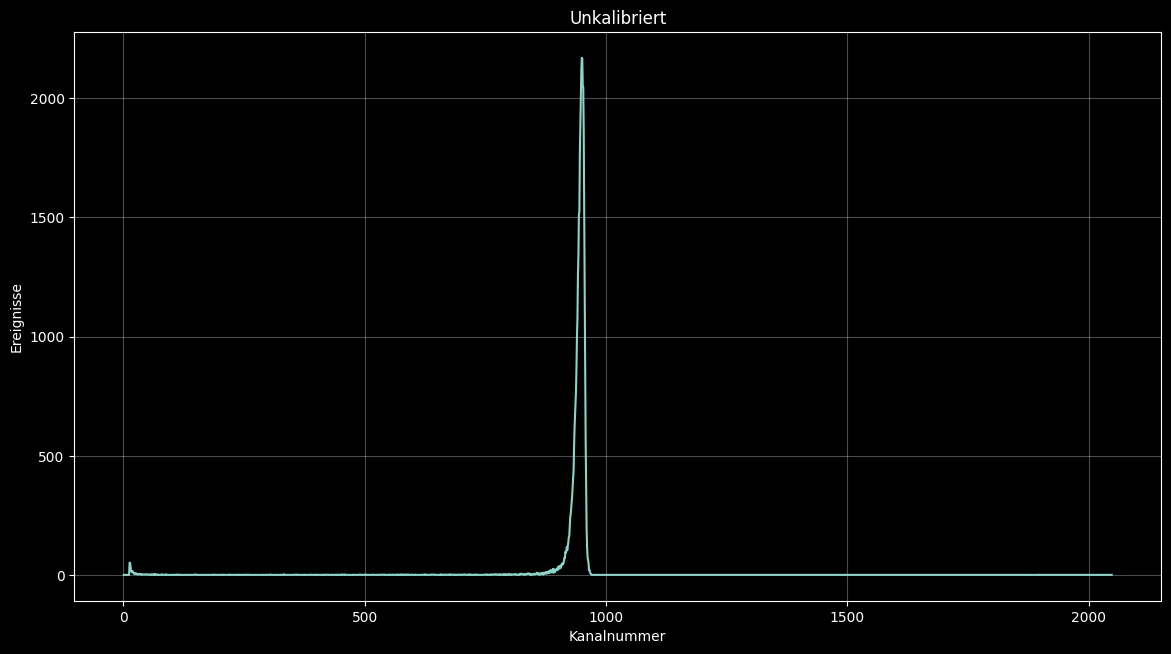

In [5]:
cm = 1/2.54 # inch to cm, metric like brrr

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_w_vac["Kanal"], Am_w_vac["Impulse"])
# ax.plot(Ra_w_vac["Kanal"], Ra_w_vac["Impulse"] / 100)
ax.set_title("Unkalibriert")
ax.set_xlabel("Kanalnummer")
ax.set_ylabel("Ereignisse")
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

Um die Daten zu kalibrieren, müssen die ``Energie(keV)``-Zeilen so entlang der ``Impulse``-Zeilen verschoben werden, dass der Peak bei der entsprechenden Energie zum liegen kommt.  

Wie gehen wir dabei vor?

1. Peakindex des \textit{Eichstrahlers} Am241 im Vakuum und ohne Absorber suchen.
2. Die Energiewerte so verschieben, dass $5486 \text{keV}$ am Peak Index liegt.
3. Links und rechts um die erwartete Energie mit übrigen Werten auffüllen.

In [6]:
def BetterEnergyCalib(calib_frame, to_calib_frame, energy):
    # 1.
    peakidx = calib_frame["Impulse"].idxmax()
    hpeak = []
    for index, value in calib_frame["Impulse"].iteritems():
        if value > (calib_frame["Impulse"].iloc[peakidx] / 2.0):
            hpeak.append(index)
    peakidx = int(np.floor(len(hpeak) / 2) + hpeak[0])
    print("Peak Index: ", peakidx)

    # 2. und 3.
    arr = [energy]
    arr = np.pad(arr, (peakidx, len(to_calib_frame)-peakidx-1), mode="linear_ramp", end_values=(energy-peakidx, energy+len(to_calib_frame)-peakidx))
    print(len(arr))
    print(arr)

    to_calib_frame["Energie(keV)"] = arr
    return to_calib_frame

In [15]:
def EvenBetterEnergyCalib(calib_frame, energy):
    # 1.
    peakidx = calib_frame["Impulse"].idxmax()
    fhmw_peaks = []
    for index, value in calib_frame["Impulse"].iteritems():
        if value > (calib_frame["Impulse"].iloc[peakidx] / 2.0):
            fhmw_peaks.append(index)
    fhmw = len(fhmw_peaks) # get full half mean width (energy resolution)
    fhmw_left = fhmw_peaks[0] # get FHMW left edge coords
    fhmw_right = fhmw_peaks[-1] # get FHMW right edge coords
    print("Linke flanke ", calib_frame["Impulse"][fhmw_peaks[0]])
    print("Rechte Flanke :", calib_frame["Impulse"][fhmw_peaks[-1]])

    peakidx = int(np.round(fhmw / 2) + fhmw_left) # get location of the peak
    # peakidx = [int(np.round(fhmw / 2) + fhmw_left), calib_frame["Impulse"][peakidx]]
    EnAtPeakidx = calib_frame["Energie(keV)"][peakidx] # 
    coeff = energy / EnAtPeakidx

    print("Peak Index: ", peakidx)

    # 2. und 3.
    # arr = [energy]
    # arr = np.pad(arr, (peakidx, len(to_calib_frame)-peakidx-1), mode="linear_ramp", end_values=(energy-peakidx, energy+len(to_calib_frame)-peakidx))
    # print(len(arr))
    # print(arr)

    # to_calib_frame["Energie(keV)"] = arr
    return coeff, fhmw, fhmw_left, fhmw_right

In [21]:
arr = []
for index, value in Am_w_vac["Impulse"].iteritems():
    if value > (Am_w_vac["Impulse"].iloc[949] / 2.0):
            arr.append(index)

In [14]:
print(Am_w_vac["Impulse"].iloc[949])

2170


In [8]:
# EvenBetterEnergyCalib(Am_w_vac, 5486)
# print(EvenBetterEnergyCalib(Am_w_vac, 5486))
# Am_w_vac_mod["Energie(keV)"] = EvenBetterEnergyCalib(Am_w_vac, 5486) * Am_w_vac_mod["Energie(keV)"]

Die Quelldaten sollen erstmal unverändert bleiben. Daher wird eine Kopie erstellt und damit weiter gearbeitet.

In [16]:
if "Am_w_vac_mod" in globals():
    del Am_w_vac_mod
Am_w_vac_mod = copy.deepcopy(Am_w_vac)
ecoeff, fhmw, fhmw_left, fhmw_right = EvenBetterEnergyCalib(Am_w_vac, 5486)
Am_w_vac_mod["Energie(keV)"] = ecoeff * Am_w_vac_mod["Energie(keV)"]
# print(Am_w_vac_mod)

Linke flanke  1254
Rechte Flanke : 1194
Peak Index:  949


In [10]:
print(Am_w_vac["Impulse"].iloc[949] / 2.0)

1085.0


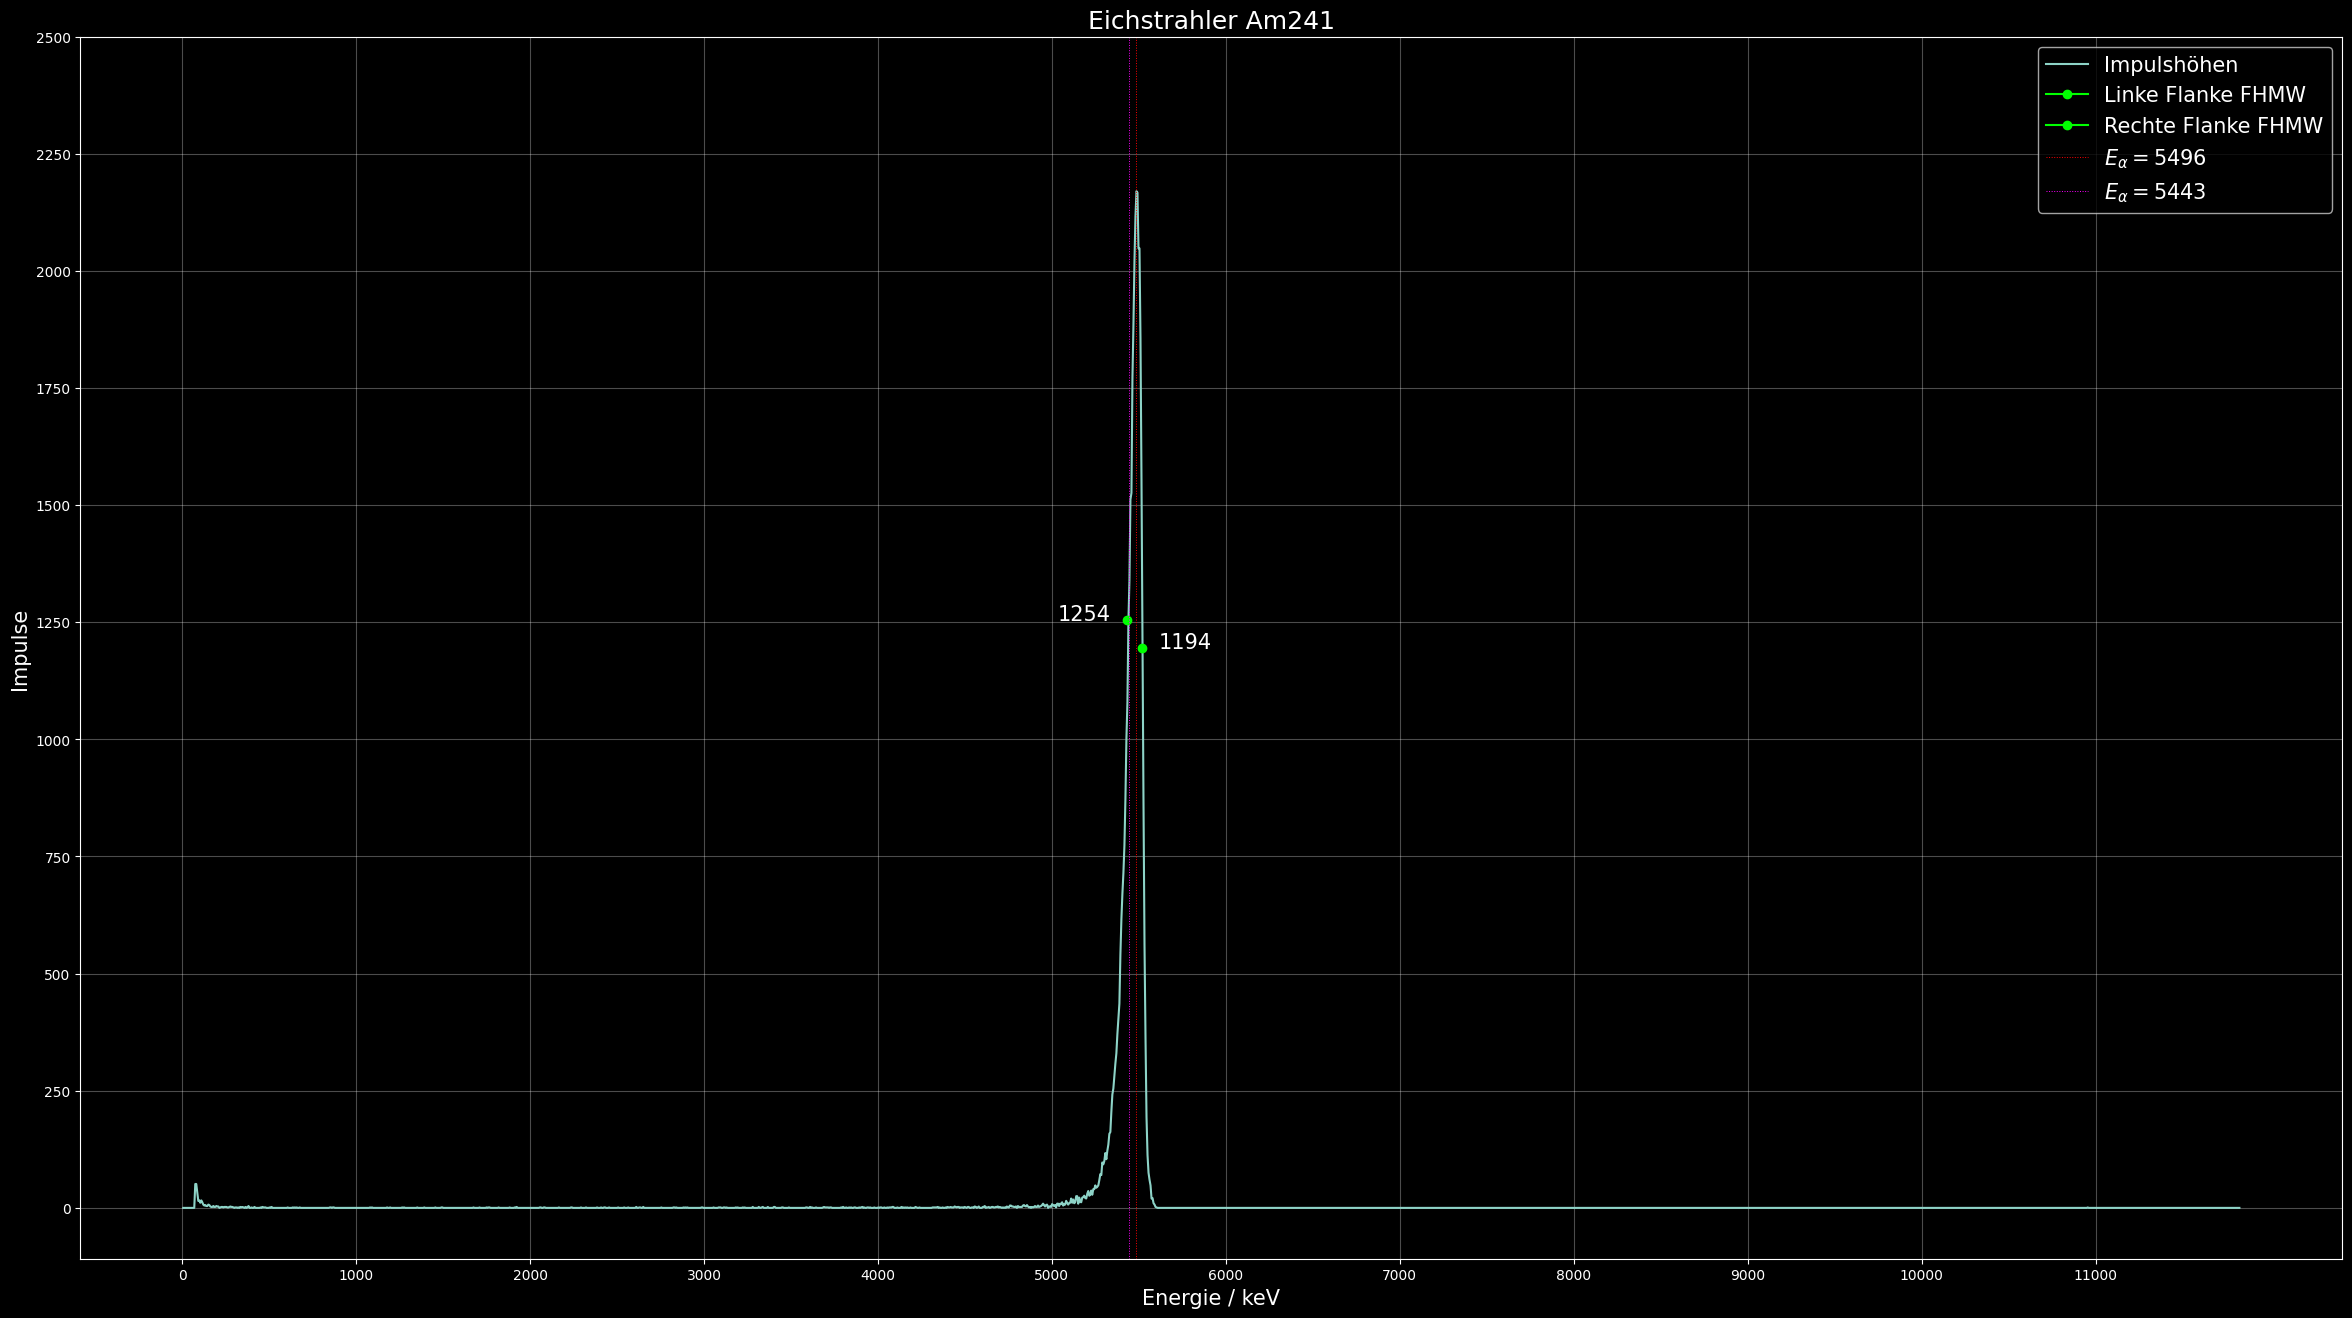

In [95]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size=60

fig, ax = plt.subplots(figsize=(60*cm, 60*(9/16)*cm))

ax.plot(Am_w_vac_mod["Energie(keV)"], Am_w_vac_mod["Impulse"], label="Impulshöhen")
ax.plot(np.round(fhmw_left * ecoeff), Am_w_vac_mod["Impulse"][fhmw_left], marker="o", color="#00FF00", label="Linke Flanke FHMW")
ax.plot(np.round(fhmw_right * ecoeff), Am_w_vac_mod["Impulse"][fhmw_right], marker="o", color="#00FF00", label="Rechte Flanke FHMW")
ax.axvline(x=5486, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5496$", color="#FF0000")
ax.axvline(x=5443, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5443$", color="#FF00FF")

ax.set_xticks(np.arange(0, max(Am_w_vac["Energie(keV)"]*ecoeff)+1, 1000))
ax.set_yticks(np.arange(0, max(Am_w_vac["Impulse"])+501, 250))

ax.set_title("Eichstrahler Am241", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend(fontsize=15)

ax.text(np.round(fhmw_left * ecoeff) - 400, Am_w_vac_mod["Impulse"][fhmw_left], Am_w_vac_mod["Impulse"][fhmw_left], size=0.25*size)
ax.text(np.round(fhmw_right * ecoeff) + 100, Am_w_vac_mod["Impulse"][fhmw_right], Am_w_vac_mod["Impulse"][fhmw_right], size=0.25*size)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

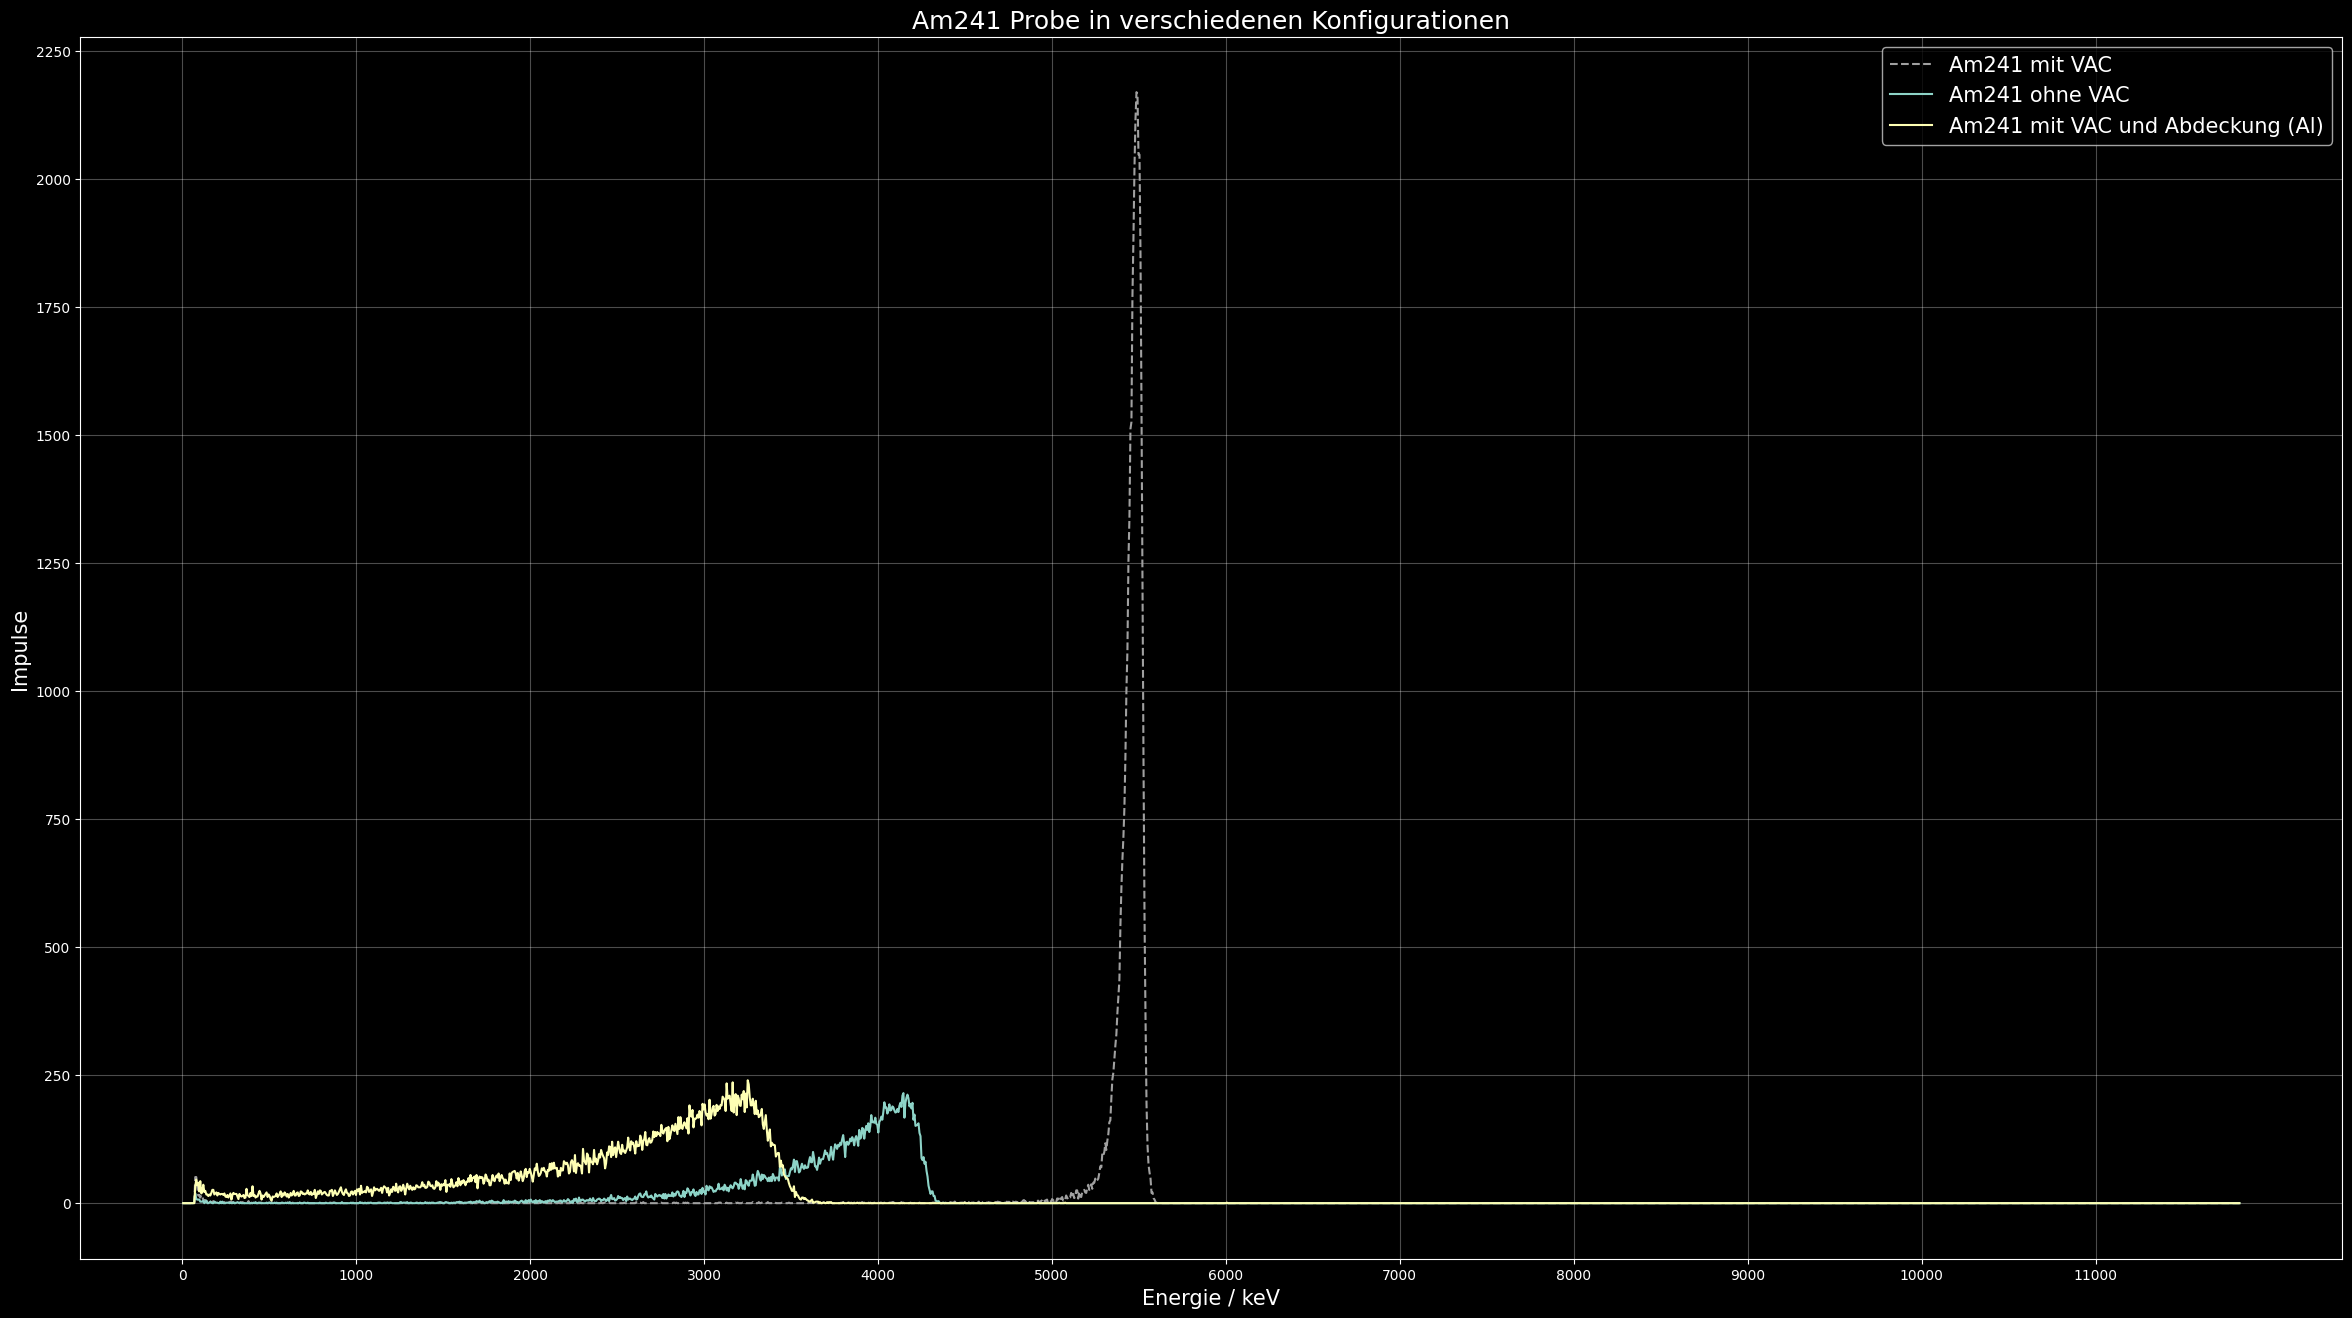

In [99]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(size*cm, size*(9/16)*cm))

ax.plot(Am_w_vac_mod["Energie(keV)"], Am_w_vac_mod["Impulse"], color="#A0A0A0", linestyle="--", label="Am241 mit VAC")
ax.plot(Am_wo_vac["Energie(keV)"]*ecoeff, Am_wo_vac["Impulse"], label="Am241 ohne VAC")
ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 mit VAC und Abdeckung (Al)")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 2500, 250))

ax.set_title("Am241 Probe in verschiedenen Konfigurationen", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend(fontsize=0.25*size)

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

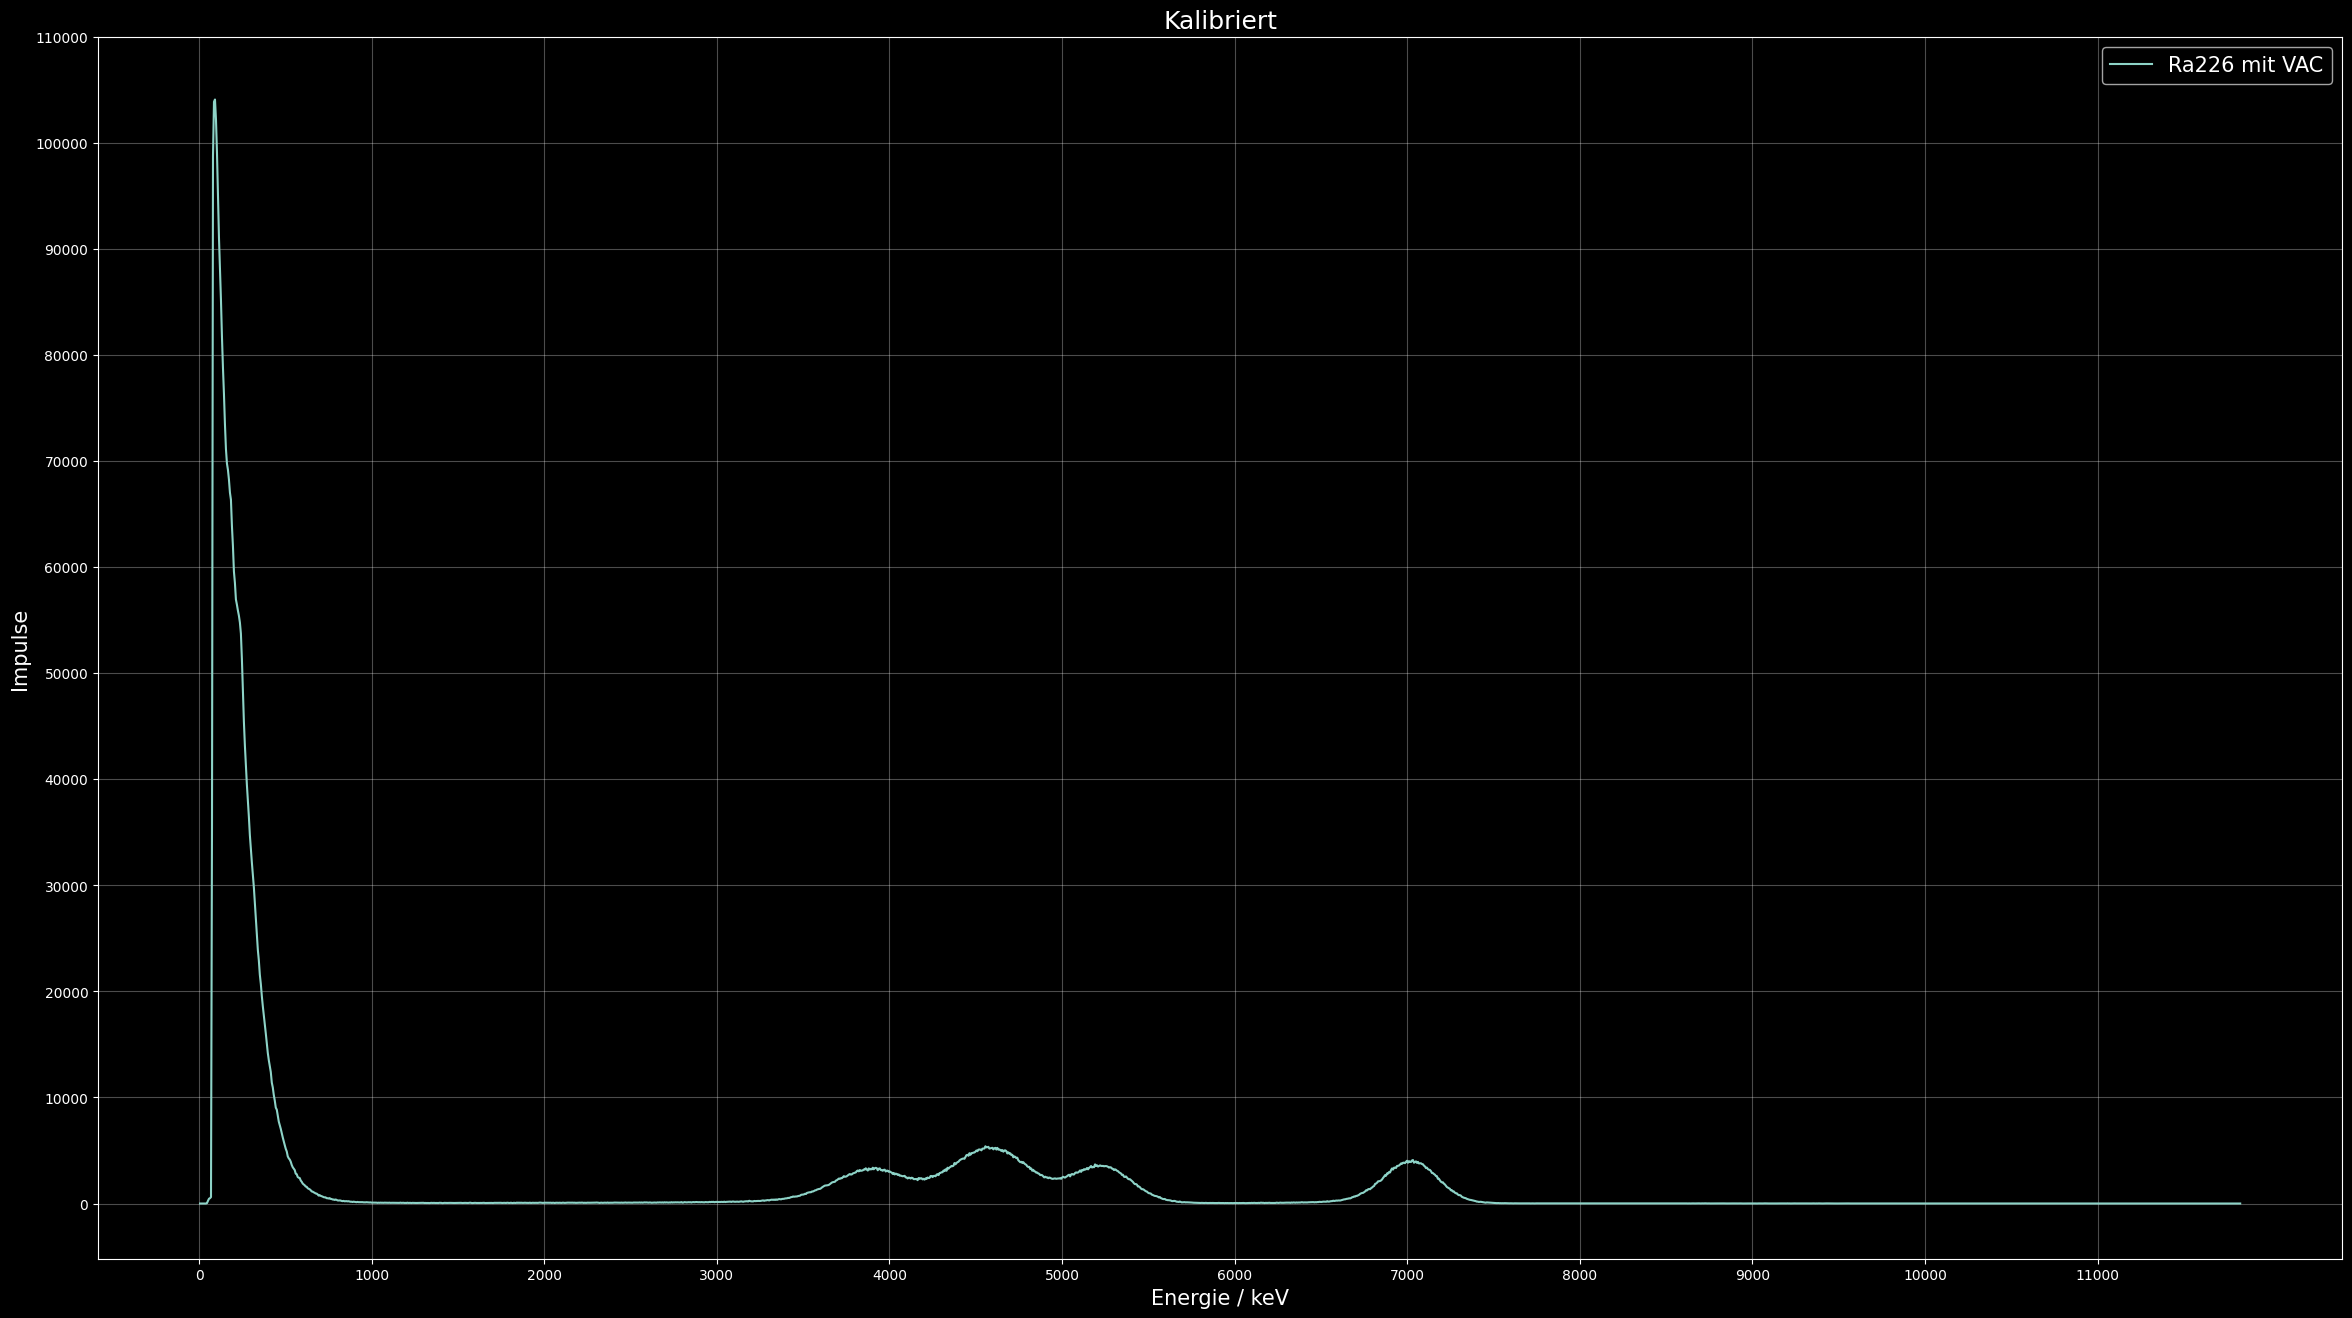

In [101]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(size*cm, size*(9/16)*cm))

# ax.plot(Am_wo_vac["Energie(keV)"]*ecoeff, Am_wo_vac["Impulse"], label="Am241 ohne VAC")
# ax.plot(Am_w_vac_mod["Energie(keV)"], Am_w_vac_mod["Impulse"], label="Am241 mit VAC")
# ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 mit VAC und Abdeckung (Al)")
ax.plot(Ra_w_vac["Energie(keV)"]*ecoeff, Ra_w_vac["Impulse"], label="Ra226 mit VAC")
# ax.plot(Empty_wo_vac["Energie(keV)"]*ecoeff, Empty_wo_vac["Impulse"], label="Leermessung ohne VAC")
# ax.plot(np.round(fhmw_left * ecoeff), Am_wo_vac["Impulse"][fhmw_left], marker="o", color="#00FF00", label="Linke Flanke FHMW")
# ax.plot(np.round(fhmw_right * ecoeff), Am_wo_vac["Impulse"][fhmw_right], marker="o", color="#00FF00", label="Rechte Flanke FHMW")
# ax.axvline(x=5486, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5496$", color="#FF0000")
# ax.axvline(x=5443, linestyle="dotted", linewidth=.7, label="$E_{\\alpha} = 5443$", color="#FF0000")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 120000, 10000))

ax.set_title("Kalibriert", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend(fontsize=0.25*size)

# ax.text(np.round(fhmw_left * ecoeff) - 400, Am_wo_vac["Impulse"][fhmw_left], Am_wo_vac["Impulse"][fhmw_left], size=15)
# ax.text(np.round(fhmw_right * ecoeff) + 100, Am_wo_vac["Impulse"][fhmw_right], Am_wo_vac["Impulse"][fhmw_right], size=15)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

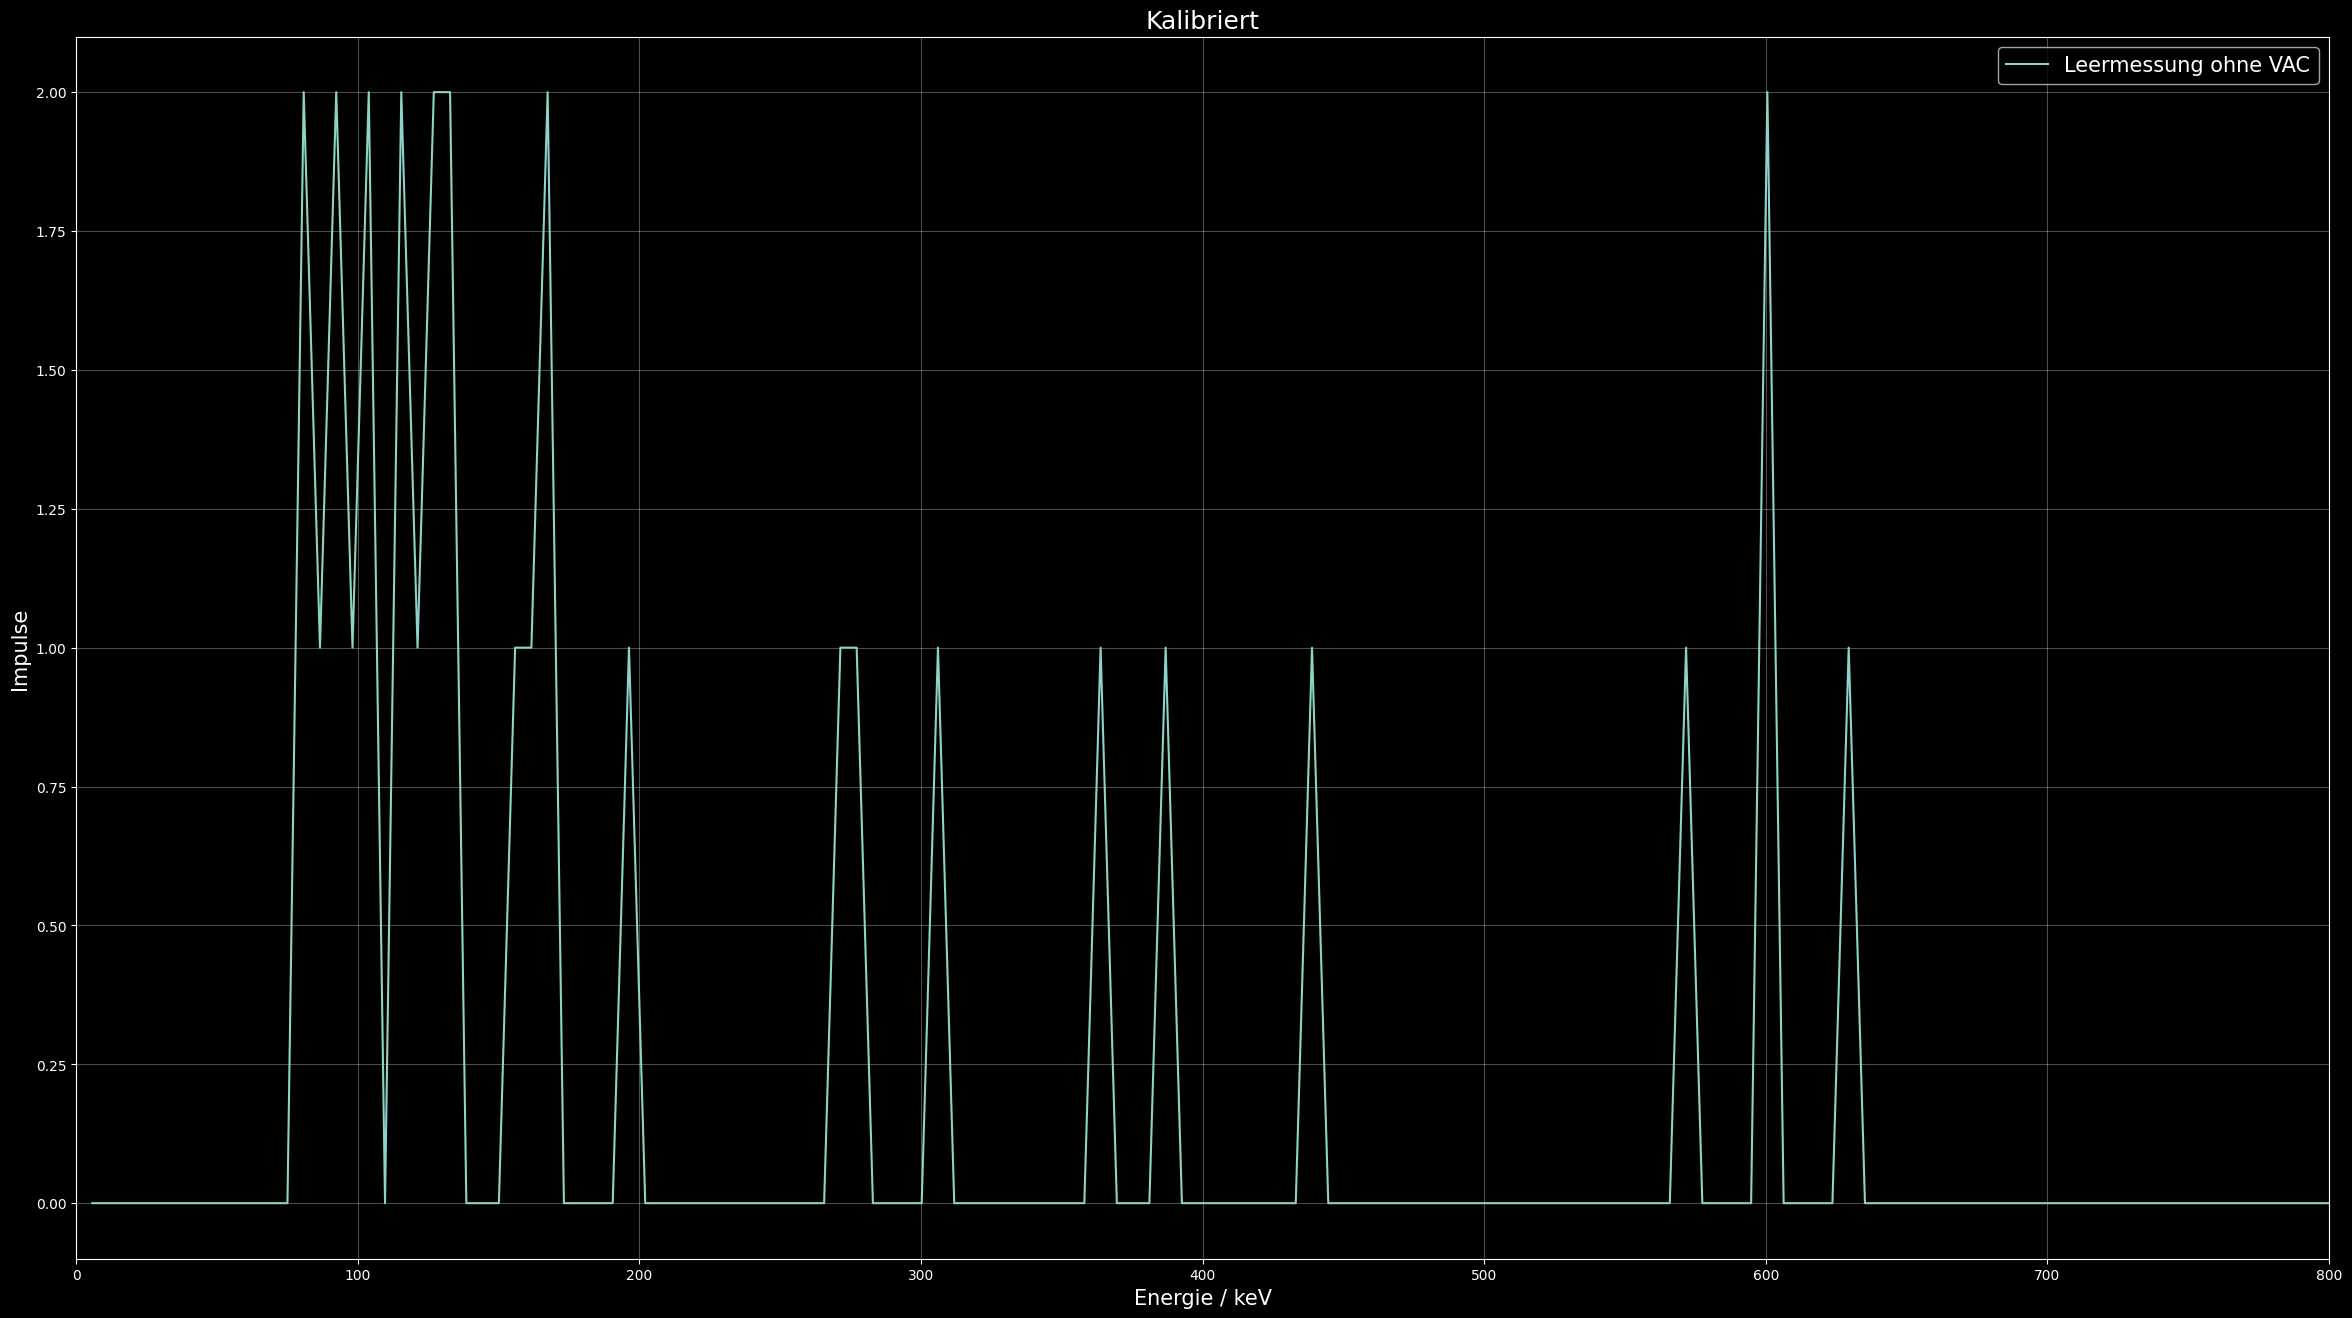

In [88]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
size = 60

fig, ax = plt.subplots(figsize=(size*cm, size*(9/16)*cm))

ax.plot(Empty_wo_vac["Energie(keV)"]*ecoeff, Empty_wo_vac["Impulse"], label="Leermessung ohne VAC")
ax.set_xlim(0,800)

# ax.set_xticks(np.arange(0, max(Am_wo_vac["Energie(keV)"]*ecoeff)+1, 1000))
# ax.set_yticks(np.arange(0, max(Am_wo_vac["Impulse"])+1, 250))

ax.set_title("Kalibriert", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend(fontsize=0.25*size)

# ax.text(np.round(fhmw_left * ecoeff) - 400, Am_wo_vac["Impulse"][fhmw_left], Am_wo_vac["Impulse"][fhmw_left], size=15)
# ax.text(np.round(fhmw_right * ecoeff) + 100, Am_wo_vac["Impulse"][fhmw_right], Am_wo_vac["Impulse"][fhmw_right], size=15)
ax.grid(axis='both', alpha=.3)

plt.tight_layout()